In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

In [62]:
data=pd.read_excel(r"C:\Users\Saurabh Srivastava\Desktop\data trained projects\Flight_Ticket_Participant_Datasets\Data_Train.xlsx")
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [64]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [65]:
# check categorical column
for column in data.columns:
    if data[column].dtype==object:
        print(str(column)+ " : "+str(data[column].unique()))
        print(data[column].value_counts())
        print('-------------------------------------')

Airline : ['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']
Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64
-------------------------------------
Date_of_Journey : ['24/03/2019' '1/05/2019' '9/06/2019' '12/05/2019' '01/03/2019'
 '24/06/2019' '12/03/2019' '27/05/2019' '1/06/2019' '18/04/2019'
 '9/05/2019' '24/04/2019' '3/03/2019' '15/04/2019' '12/06/2019'
 '6/03/2019' '21

In [66]:
data['Route'].isnull().sum()

1

In [67]:
data=data.dropna()

In [68]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [69]:
data['date_day']=pd.to_datetime(data['Date_of_Journey'],format="%d/%m/%Y").dt.day

In [70]:
data['date_month']=pd.to_datetime(data['Date_of_Journey'],format="%d/%m/%Y").dt.month

In [71]:
data['date_year']=pd.to_datetime(data['Date_of_Journey'],format="%d/%m/%Y").dt.year

In [72]:
data.drop(columns=['Date_of_Journey'],inplace=True)

<Figure size 3960x1080 with 0 Axes>

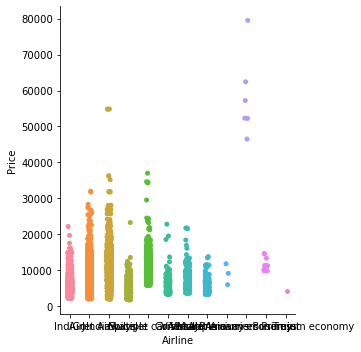

In [96]:
plt.figure(figsize=(55,15))
sns.catplot(y='Price',x='Airline',data=data)
plt.show()

In [73]:
data

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,date_day,date_month,date_year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,9,4,2019
10679,Air India,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,4,2019
10680,Jet Airways,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,27,4,2019
10681,Vistara,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,1,3,2019


In [74]:
data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [75]:
data['Total_Stops']=data['Total_Stops'].replace({'non-stop':0,'2 stops':2,'1 stop':1,'3 stops':3,'4 stops':4})

In [76]:
data['Arrival_hour']=pd.to_datetime(data['Arrival_Time']).dt.hour
data['Arrival_min']=pd.to_datetime(data['Arrival_Time']).dt.minute                               

In [77]:
data.drop(columns=['Arrival_Time'],inplace=True)

In [78]:
duration=list(data['Duration'])

for i in range(len(duration)):
    if len(duration[i].split())!=2:
        if 'h' in duration[i]:
            duration[i]=duration[i].strip() +" 0m"
        else:
            duration[i]="0h "+duration[i]
duration_hours=[]
duration_mins=[]
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep="h")[0]))
    duration_mins.append(int(duration[i].split(sep="m")[0].split()[-1]))

In [79]:
data['Duration_hours']=duration_hours
data['Duration_mins']=duration_mins

In [80]:
data.drop(columns=['Duration'],inplace=True)

In [81]:
data['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [82]:
data.drop(columns=['Route','Additional_Info'],inplace=True)

In [83]:
data.drop(columns=['Dep_Time'],inplace=True)

In [84]:
data

,Airline,Source,Destination,Total_Stops,Price,date_day,date_month,date_year,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,2019,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,2019,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,2019,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,2019,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,2019,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0,4107,9,4,2019,22,25,2,30
10679,Air India,Kolkata,Banglore,0,4145,27,4,2019,23,20,2,35
10680,Jet Airways,Banglore,Delhi,0,7229,27,4,2019,11,20,3,0
10681,Vistara,Banglore,New Delhi,0,12648,1,3,2019,14,10,2,40


In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Airline         10682 non-null  object
 1   Source          10682 non-null  object
 2   Destination     10682 non-null  object
 3   Total_Stops     10682 non-null  int64 
 4   Price           10682 non-null  int64 
 5   date_day        10682 non-null  int64 
 6   date_month      10682 non-null  int64 
 7   date_year       10682 non-null  int64 
 8   Arrival_hour    10682 non-null  int64 
 9   Arrival_min     10682 non-null  int64 
 10  Duration_hours  10682 non-null  int64 
 11  Duration_mins   10682 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 1.1+ MB


In [86]:
df=pd.get_dummies(data,columns=['Airline','Source','Destination'],drop_first=True)

In [87]:
df

,Total_Stops,Price,date_day,date_month,date_year,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,2019,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,2019,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,2019,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,2019,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,2019,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,4107,9,4,2019,22,25,2,30,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
10679,0,4145,27,4,2019,23,20,2,35,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
10680,0,7229,27,4,2019,11,20,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
10681,0,12648,1,3,2019,14,10,2,40,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [97]:
data_test=pd.read_excel(r"C:\Users\Saurabh Srivastava\Desktop\data trained projects\Flight_Ticket_Participant_Datasets\Test_set.xlsx")
data_test

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [98]:
data_test.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [99]:
data_test['date_day']=pd.to_datetime(data_test['Date_of_Journey'],format="%d/%m/%Y").dt.day

In [100]:
data_test['date_month']=pd.to_datetime(data_test['Date_of_Journey'],format="%d/%m/%Y").dt.month

In [101]:
data_test['date_year']=pd.to_datetime(data_test['Date_of_Journey'],format="%d/%m/%Y").dt.year

In [102]:
data_test.drop(columns=['Date_of_Journey'],inplace=True)

In [104]:
data_test['Total_Stops'].unique()

array(['1 stop', 'non-stop', '2 stops', '3 stops', '4 stops'],
      dtype=object)

In [105]:
data_test['Total_Stops']=data_test['Total_Stops'].replace({'non-stop':0,'2 stops':2,'1 stop':1,'3 stops':3,'4 stops':4})

In [106]:
duration=list(data_test['Duration'])

for i in range(len(duration)):
    if len(duration[i].split())!=2:
        if 'h' in duration[i]:
            duration[i]=duration[i].strip() +" 0m"
        else:
            duration[i]="0h "+duration[i]
duration_hours=[]
duration_mins=[]
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep="h")[0]))
    duration_mins.append(int(duration[i].split(sep="m")[0].split()[-1]))

In [107]:
data_test['Duration_hours']=duration_hours
data_test['Duration_mins']=duration_mins

In [108]:
data_test.drop(columns=['Duration'],inplace=True)

In [109]:
data_test.drop(columns=['Route','Additional_Info'],inplace=True)

In [110]:
data_test.drop(columns=['Dep_Time'],inplace=True)

In [111]:
df_test=pd.get_dummies(data_test,columns=['Airline','Source','Destination'],drop_first=True)

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 29 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   Total_Stops                                10682 non-null  int64
 1   Price                                      10682 non-null  int64
 2   date_day                                   10682 non-null  int64
 3   date_month                                 10682 non-null  int64
 4   date_year                                  10682 non-null  int64
 5   Arrival_hour                               10682 non-null  int64
 6   Arrival_min                                10682 non-null  int64
 7   Duration_hours                             10682 non-null  int64
 8   Duration_mins                              10682 non-null  int64
 9   Airline_Air India                          10682 non-null  uint8
 10  Airline_GoAir                              106

In [128]:
x=df.drop(columns=['Price'])
x.head()

,Total_Stops,date_day,date_month,date_year,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,2019,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,1,5,2019,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,9,6,2019,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,12,5,2019,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,1,3,2019,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [129]:
y=df['Price']

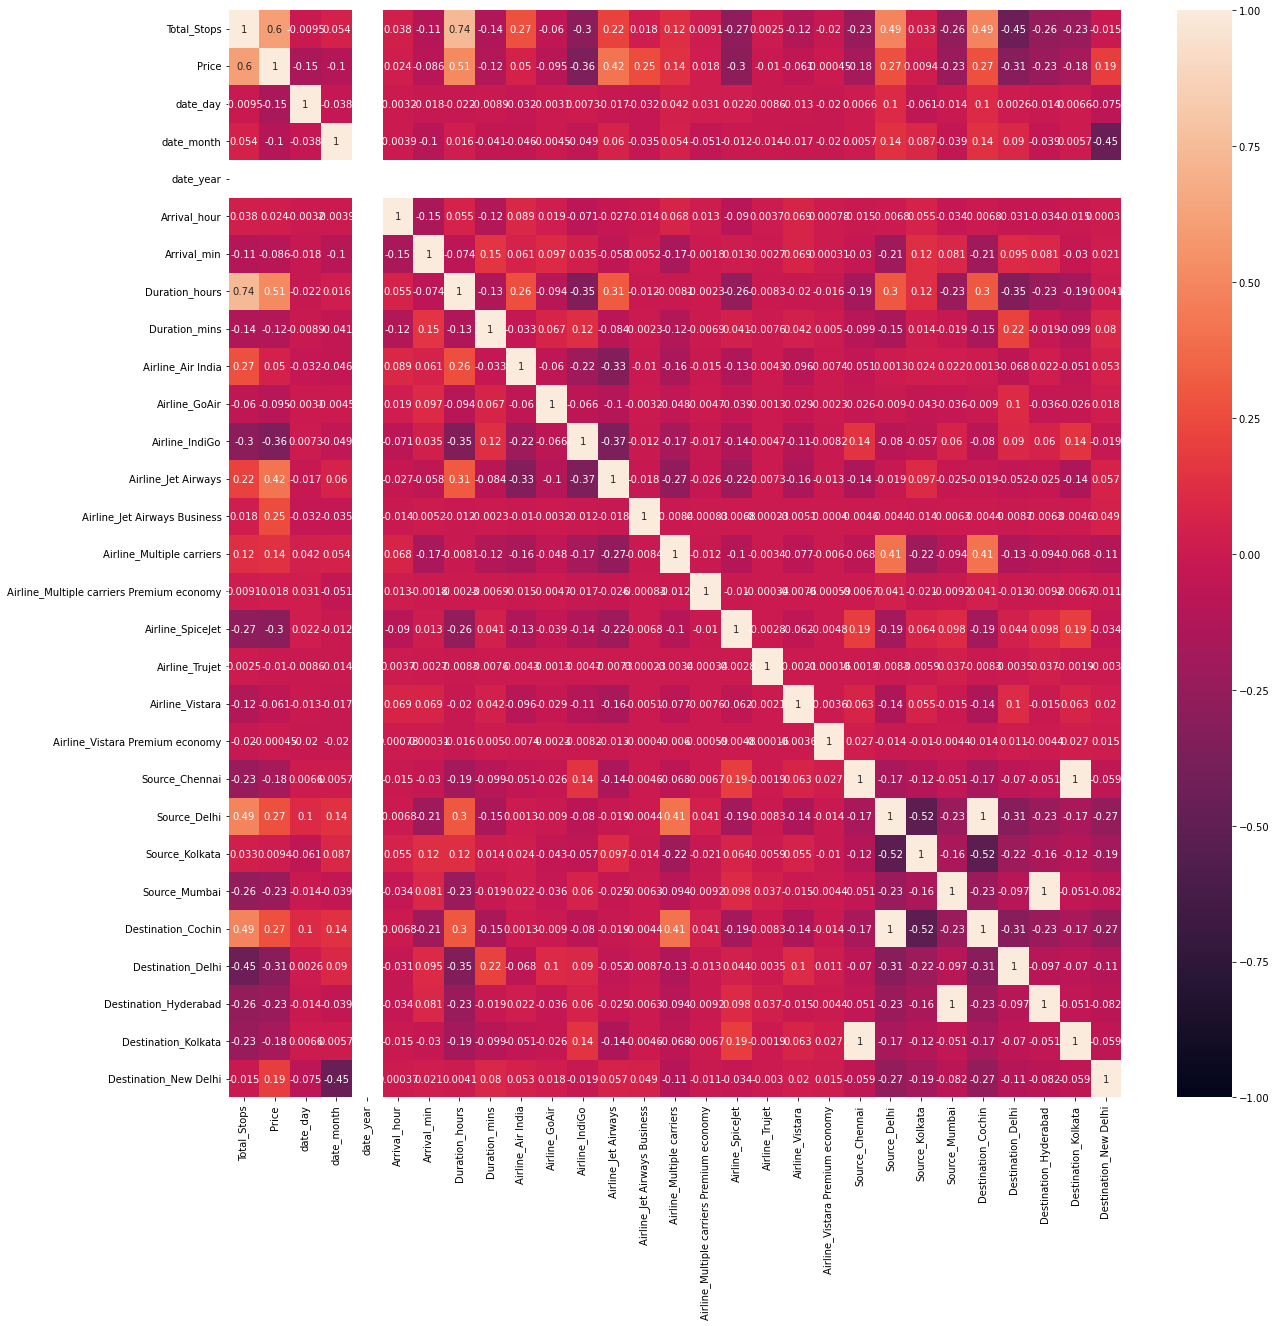

In [204]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),vmin=-1,vmax=1,annot=True)
plt.show()

In [131]:
from sklearn.ensemble import ExtraTreesRegressor
selection=ExtraTreesRegressor()
selection.fit(x,y)

ExtraTreesRegressor()

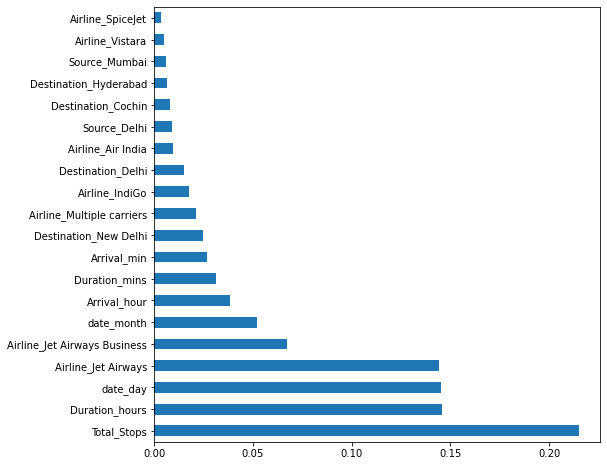

In [132]:
plt.figure(figsize=(8,8))
feat_importances=pd.Series(selection.feature_importances_,index=x.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [133]:
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV

In [134]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=55)

In [142]:
from sklearn.linear_model import LinearRegression

In [143]:
lr=LinearRegression()

In [144]:
lr.fit(x_train,y_train)

LinearRegression()

In [145]:
lr.score(x_train,y_train)

0.63774596031933

In [146]:
lr_pred=lr.predict(x_test)

In [147]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [148]:
print('MAE:',mean_absolute_error(y_test,lr_pred))
print('MSE:',mean_squared_error(y_test,lr_pred))
print('R2:',r2_score(y_test,lr_pred))
print('RMSE:',np.sqrt(mean_squared_error(y_test,lr_pred)))

MAE: 1993.0502746692723
MSE: 9051567.928147016
R2: 0.5881225172743283
RMSE: 3008.5823784877516


In [154]:
lin_score=cross_val_score(lr,x,y,cv=5,scoring='neg_mean_absolute_error')
lr_score_n=-lin_score
print('CV_MAE',np.mean(lr_score_n))
lin_score=cross_val_score(lr,x,y,cv=5,scoring='neg_mean_squared_error')
lr_score_n=-lin_score
print('CV_MSE',np.mean(lr_score_n))
lin_score=cross_val_score(lr,x,y,cv=5,scoring='r2')
lr_score_n=-lin_score
print('CV_R2',np.mean(lr_score_n))

CV_MAE 1964.959162427212
CV_MSE 8085349.205181921
CV_R2 -0.6193428134424913


In [155]:
from sklearn.ensemble import RandomForestRegressor

In [156]:
rf=RandomForestRegressor()

In [157]:
rf.fit(x_train,y_train)

RandomForestRegressor()

In [158]:
rf.score(x_train,y_train)

0.9554497072806228

In [159]:
rf.score(x_test,y_test)

0.80002852888009

In [160]:
rf_pred=rf.predict(x_test)

In [161]:
print('MAE:',mean_absolute_error(y_test,rf_pred))
print('MSE:',mean_squared_error(y_test,rf_pred))
print('R2:',r2_score(y_test,rf_pred))
print('RMSE:',np.sqrt(mean_squared_error(y_test,rf_pred)))

MAE: 1192.1150759131144
MSE: 4394645.083666617
R2: 0.80002852888009
RMSE: 2096.340879644009


In [164]:
lin_score=cross_val_score(rf,x,y,cv=5,scoring='r2').mean()
print('CV_R2',lin_score)

CV_R2 0.8143652944992441


In [196]:
prediction=rf.predict(x_test)
prediction

array([11748.345     , 11603.83      ,  4804.        , ...,
        5470.63333333, 14413.235     ,  4823.        ])

In [197]:
import pickle

In [199]:
file=open('flight_rf.pkl','wb')
pickle.dump(rf,file)

In [200]:
model=open('flight_rf.pkl','rb')
forest=pickle.load(model)

In [201]:
y_prediction=forest.predict(x_test)
y_prediction

array([11748.345     , 11603.83      ,  4804.        , ...,
        5470.63333333, 14413.235     ,  4823.        ])

In [203]:
r2_score(y_test,y_prediction)

0.7972483095547331